# Clustering

Cluster analysis or clustering is an unsupervised machine learning algorithm that groups unlabeled datasets. It aims to form clusters or groups using the data points in a dataset in such a way that there is high intra-cluster similarity and low inter-cluster similarity. In, layman terms clustering aims at forming subsets or groups within a dataset consisting of data points which are really similar to each other and the groups or subsets or clusters formed can be significantly differentiated from each other.

## Different types of Clustering Algorithms
1) K-means Clustering – Using this algorithm, we classify a given data set through a certain number of predetermined clusters or “k” clusters.
2) Hierarchical Clustering – follows two approaches Divisive and Agglomerative. Agglomerative considers each observation as a single cluster then grouping similar data points until fused into a single cluster and Divisive works just opposite to it.
3) Fuzzy C means Clustering – The working of the FCM Algorithm is almost similar to the k-means clustering algorithm, the major difference is that in FCM a data point can be put into more than one cluster.
4) Density-Based Clustering – Useful in the application areas where we require non-linear cluster structures, purely based on density. example: DBSCAN, TI-DBSCAN, etc.

Now here in this article, we will be deeply focusing on the k-means Clustering algorithm, explanations of working of k-means, advantages and disadvantages, and a solved practical clustering problem that will enhance the theoretical understandings and give you a proper view of how k-means clustering works.

# How does the K-Means Algorithm Work?

The working of the K-Means algorithm is explained in the below steps:

- Step-1: Select the number K to decide the number of clusters.
- Step-2: Select random K points or centroids. (It can be other from the input dataset).
- Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.
- Step-4: Calculate the centroids and place a new centroid of each cluster.
- Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.
- Step-6: If no any datapoint changes, then FINISH.
- Step-7: The model is ready.

## Advantages of using k-means clustering
- Easy to implement.
- With a large number of variables, K-Means may be computationally faster than hierarchical clustering (if K is small).
- k-Means may produce Higher clusters than hierarchical clustering.

## Disadvantages of using k-means clustering
- Choosing manually. Difficult to predict the number of clusters (K-Value)
- Being dependent on initial values
- Clustering outliers. Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering
- Scaling with number of dimensions

# How to Perform K-Means Clustering in Python

In this section, you’ll take a step-by-step tour of the conventional version of the k-means algorithm. Understanding the details of the algorithm is a fundamental step in the process of writing your k-means clustering pipeline in Python. What you learn in this section will help you decide if k-means is the right choice to solve your clustering problem.

In [34]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

You can generate the data using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:
- n_samples is the total number of samples to generate.
- centers is the number of centers to generate.
- cluster_std is the standard deviation.

make_blobs() returns a tuple of two values:
- A two-dimensional NumPy array with the features for each of the samples
- A one-dimensional NumPy array containing the cluster labels for each sample

Text(0, 0.5, 'X2')

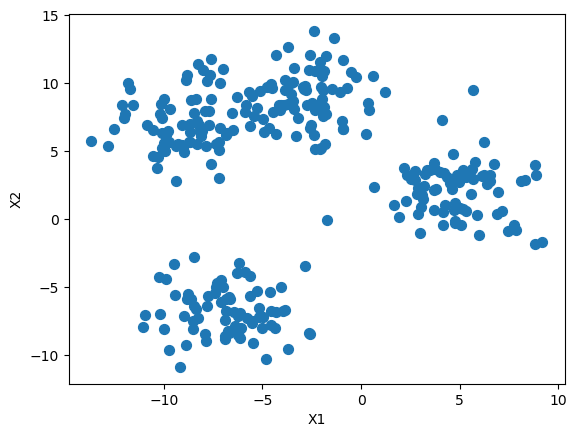

In [107]:
X, y_true = make_blobs(
                    n_samples=300,
                    centers=4,
                    cluster_std=1.96,
                    random_state=42
                    )
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.xlabel('X1')
plt.ylabel('X2')

In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

Text(0, 0.5, 'X2')

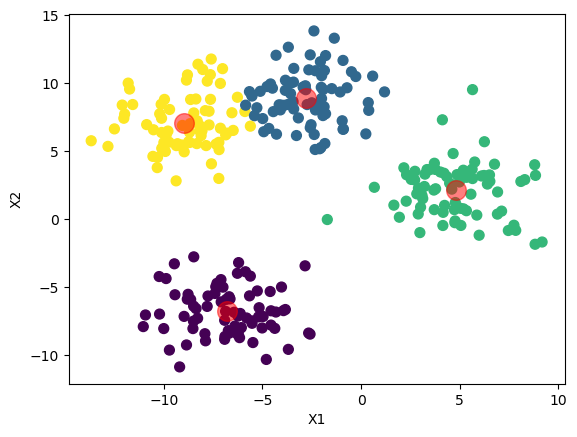

In [106]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.xlabel('X1')
plt.ylabel('X2')

## The Real Dataset:

This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, and Iris Virginica

In [98]:
import pandas as pd
mydata = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                        names=['sepal length','sepal width','petal length','petal width','class'])

In [99]:
mydata

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0, 0.5, 'petal width')

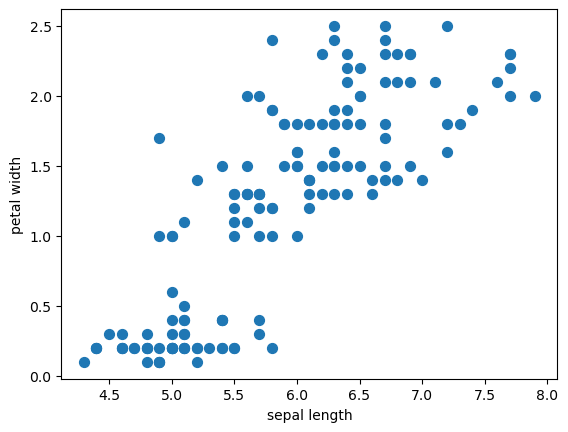

In [109]:
plt.scatter(mydata['sepal length'], mydata['petal width'], s=50);
plt.xlabel('sepal length')
plt.ylabel('petal width')

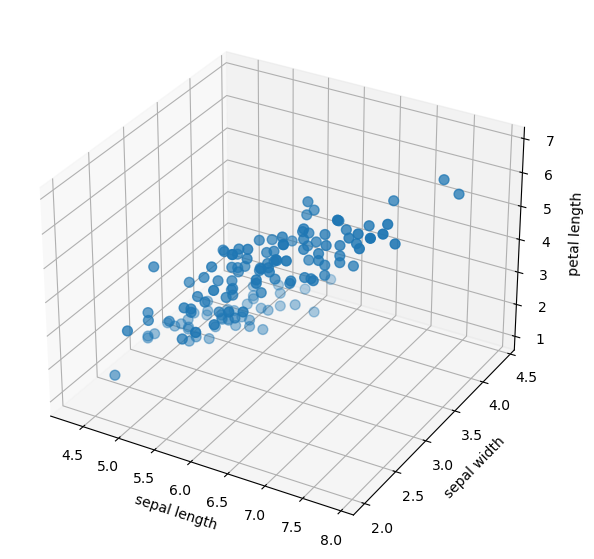

In [108]:
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(projection='3d')
ax.scatter3D(mydata['sepal length'], mydata['sepal width'], mydata['petal length'], s=50, cmap='autumn')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.show()

In [110]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(mydata.iloc[:,:-1])
y_kmeans = kmeans.predict(mydata.iloc[:,:-1])

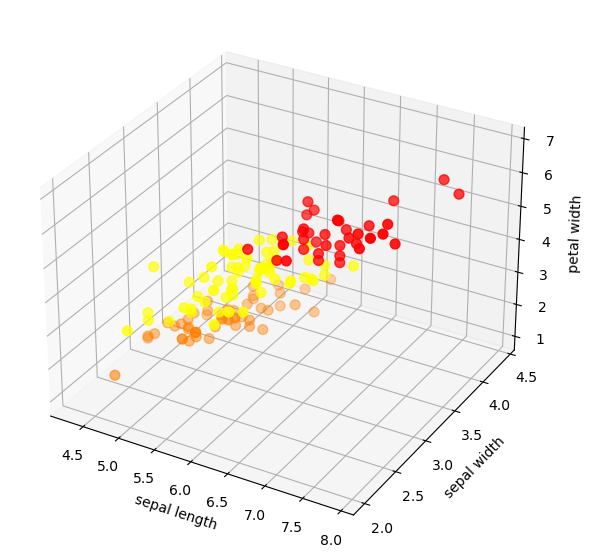

In [111]:
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(projection='3d')
ax.scatter3D(mydata['sepal length'], mydata['sepal width'], mydata['petal length'], c=y_kmeans, s=50, cmap='autumn')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal width')
plt.show()

# Finding optimum number of clusters (k)

Contrary to supervised learning where we have the ground truth to evaluate the model’s performance, clustering analysis doesn’t have a solid evaluation metric that we can use to evaluate the outcome of different clustering algorithms. Moreover, since kmeans requires k as an input and doesn’t learn it from data, there is no right answer in terms of the number of clusters that we should have in any problem. Sometimes domain knowledge and intuition may help but usually that is not the case. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling.

In this demontration, we’ll cover two metrics that may give us some intuition about k:
- Elbow method
- Silhouette analysis

## Elbow Method

**Elbow** method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.

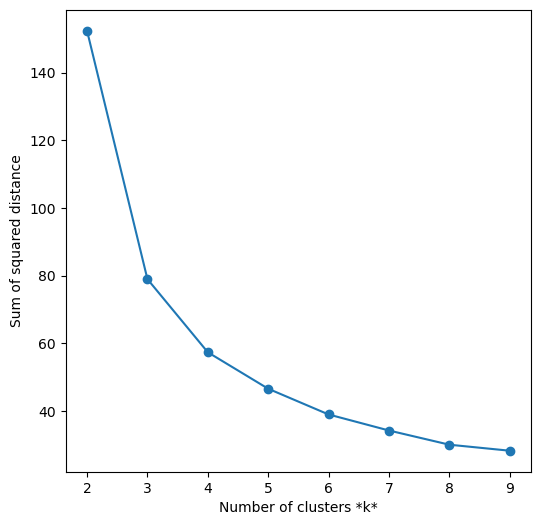

In [112]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(mydata.iloc[:,:-1])
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

The graph above shows that k=2 is not a bad choice. Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.

## Silhouette Analysis

The silhouette coefficient is can be used to determine the degree of separation between clusters. For each sample. It quantifies how well a data point fits into its assigned cluster based on two factors:
- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters. 

For each sample:
- Compute the average distance from all data points in the same cluster (ai).
- Compute the average distance from all data points in the closest cluster (bi).
- Compute the coefficient:

![](https://miro.medium.com/max/343/1*SAdv13fu4zgWRwRvGBrIWQ.png)

In [113]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mydata.iloc[:,:-1])
    score = silhouette_score(mydata.iloc[:,:-1], kmeans.labels_)
    silhouette_coefficients.append(score)

Plotting the average silhouette scores for each k shows that the best choice for k is 2,3, and 4 since it has the maximum score:

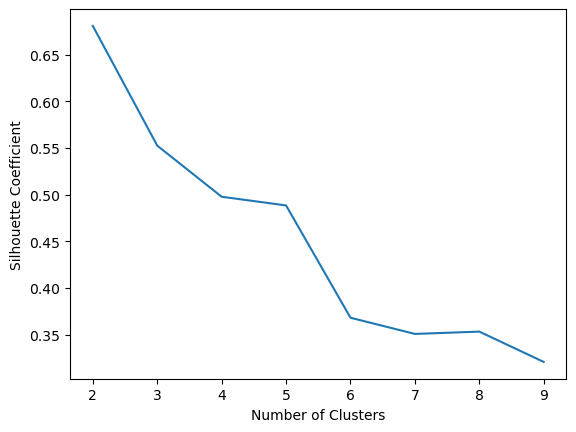

In [114]:
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# k-means is limited to linear cluster boundaries

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

In [119]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0)

Text(0, 0.5, 'X2')

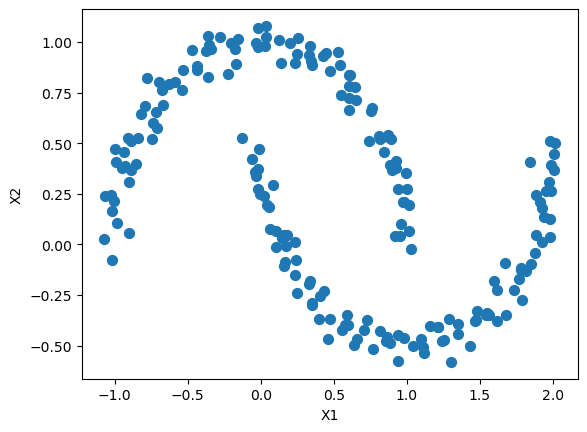

In [120]:
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

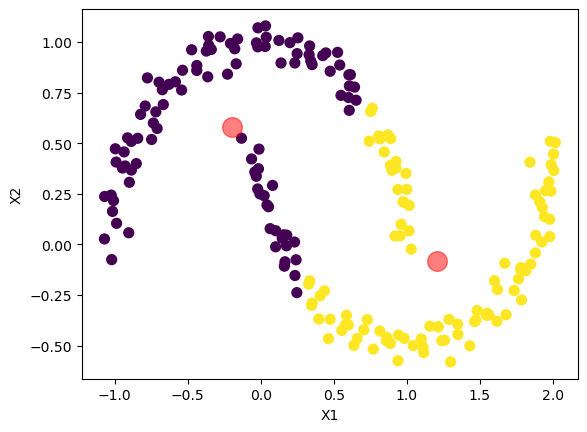

In [122]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.xlabel('X1')
plt.ylabel('X2')

This situation, we cannot use k-means clustering to solve it. We may use a kernel transformation to project the data into a higher dimension where a linear separation is possible. We might imagine using the same trick to allow k-means to discover non-linear boundaries. One version of this kernelized k-means is implemented in Scikit-Learn within the **Spectral Clustering** estimator. The other are **DBSCAN**, **TI-DBSCAN**, etc

# ------------ Continue ---------------

# Hierarchical clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

## Type of Hierarchical clustering
- 1. Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
- 2. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

## How it works?

![](https://miro.medium.com/max/784/0*E-qictlO_9isi0Dl.png)

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

## How to identify if two clusters are similar? -> Measure of distance (similarity)

The distance between two clusters can be computed based on the length of the straight line drawn from one cluster to another. This is commonly known as the Euclidean distance.

Other than Euclidean distance, several other metrics have been developed to measure distance such as:
- Manhattan Distance
- Minkowski Distance

The choice of distance metrics should be based on the field of study or the problem that you are trying to solve.



## Linkage Criterion

After selecting a distance metric, it is necessary to determine from where distance is computed. Some of the common linkage methods are:

- **Single-Linkage**: Single linkage or nearest linkage is the shortest distance between a pair of observations in two clusters.  
![](https://www.solver.com/files/images/xlminer/HClst/Single_Linkage1.gif)
$$
D(A,B) = \textrm min(d(x,y)) \\where\\ x \in A, y \in B
$$

- **Complete-linkage**: Complete linkage or farthest linkage is the farthest distance between a pair of observations in two clusters.
![](https://www.solver.com/files/images/xlminer/HClst/farthest_neighbor1.gif)
$$
D(A,B) = \textrm max(d(x,y)) \\where\\ x \in A, y \in B
$$

- **Average-linkage**: Average linkage is the distance between each observation in one cluster to every observation in the other cluster.
![](https://www.solver.com/files/images/xlminer/HClst/Group_Average1..gif)

$$
D(A,B) = \frac{\sum_{i=1}^n \sum_{j=1}^m d(x_k, y_l)}{n*m} \\where\\ x \in A, y \in B
$$

- **Ward’s-linkage**: Ward’s method or minimum variance method or Ward’s minimum variance clustering method calculates the distance between two clusters as the increase in the error sum of squares after merging two clusters into a single cluster. This method seeks to choose the successive clustering steps so as to minimize the increase in sum of squares error at each step.

![](https://miro.medium.com/max/643/1*oAKli0U57Z20-GNpcqy6AA.png)

# How to Perform Agglomerative Clustering in Python

Text(0, 0.5, 'X2')

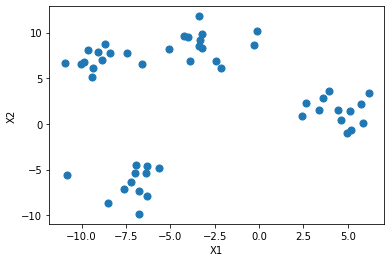

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y_true = make_blobs(
                    n_samples=50,
                    centers=4,
                    cluster_std=1.50,
                    random_state=42
                    )
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.xlabel('X1')
plt.ylabel('X2')

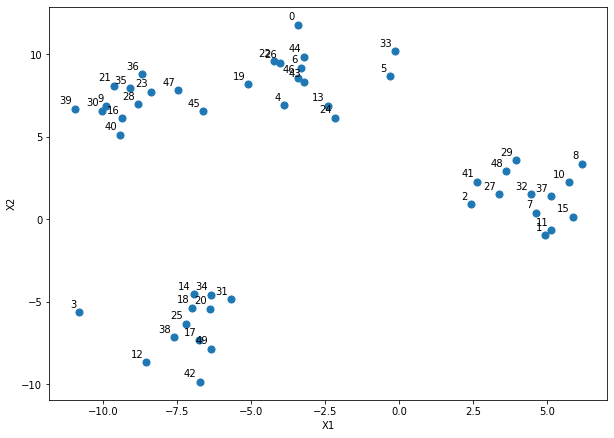

In [52]:
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], s=50)
plt.xlabel('X1')
plt.ylabel('X2')

index = range(len(X))
for id, x, y in zip(index, X[:, 0], X[:, 1]):
    plt.annotate(
        id,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

## Create a dendrogram : Single Linkege

We start by importing the library that will help to create dendrograms. Dendrogram helps to give a rough idea of the number of clusters.

Text(0, 0.5, 'Euclidean distance')

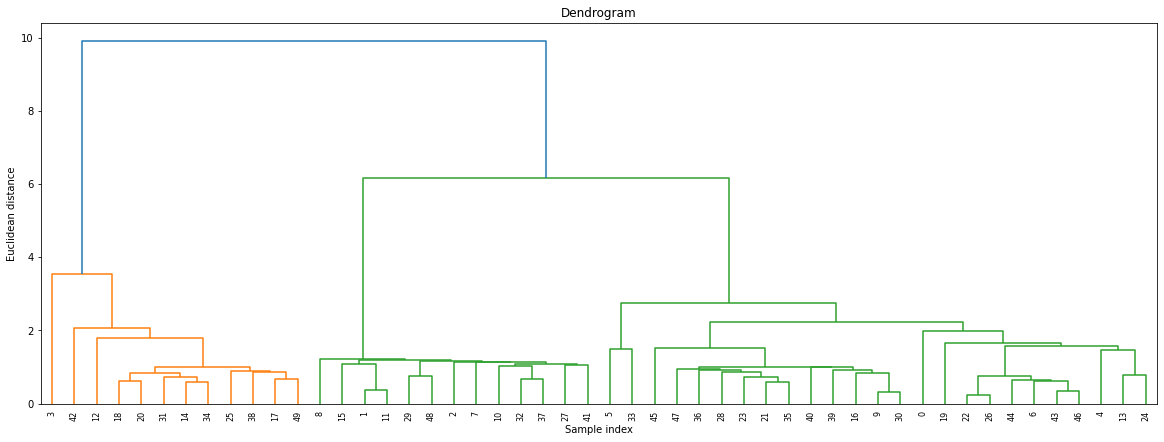

In [44]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))

# Create dendrogram
sc.dendrogram(sc.linkage(X, method='single', metric='euclidean'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

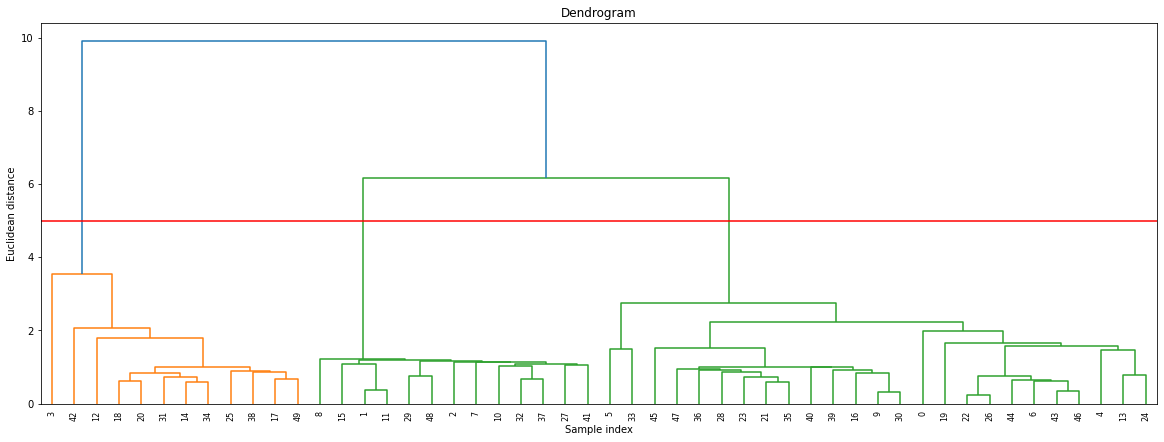

In [46]:
# Plot Settings
plt.figure(figsize=(20, 7))

# Create dendrogram
sc.dendrogram(sc.linkage(X, method='single', metric='euclidean'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.axhline(y=5, color='r', linestyle='-')

## Fit the model
We instantiate the AgglomerativeClustering. Pass euclidean distance as the measure of the distance between points and ward linkage to calculate clusters' proximity. Then we fit the model on our data points. Finally, we return an array of integers where the values correspond to the distinct categories using lables_ property.

In [47]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='single')

cluster.fit(X)
pred_labels = cluster.labels_
pred_labels

array([2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 1, 0], dtype=int64)

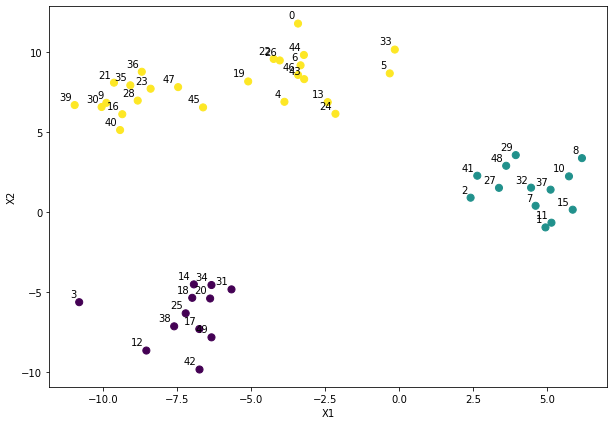

In [53]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=pred_labels, s=50)
plt.xlabel('X1')
plt.ylabel('X2')

# Let's plot index above data points
index = range(len(X))
for id, x, y in zip(index, X[:, 0], X[:, 1]):
    plt.annotate(
        id,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

you can try different linkage by using **method='complete'** and **method='average'** in **linkage** function

# The Real Dataset:

This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, and Iris Virginica

In [54]:
import pandas as pd
mydata = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                        names=['sepal length','sepal width','petal length','petal width','class'])

In [55]:
mydata

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Create a dendrogram

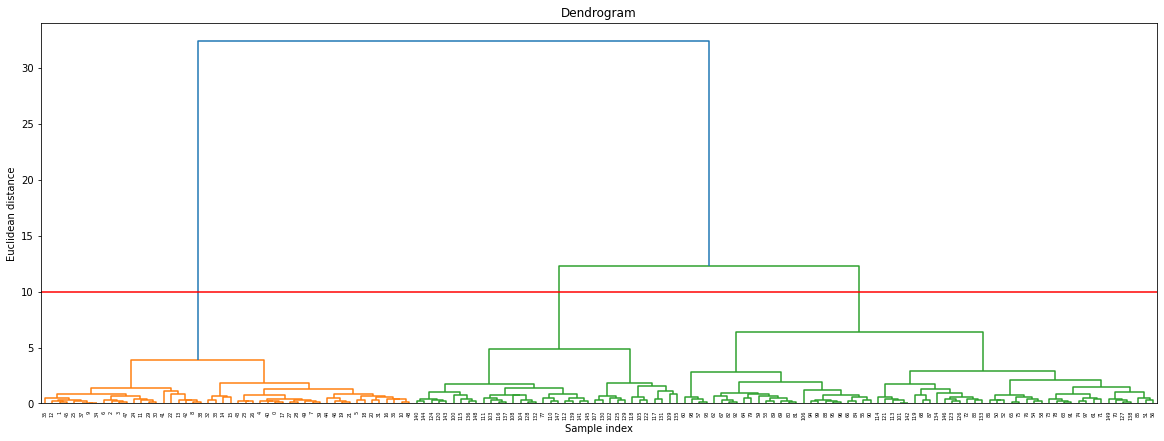

In [68]:
# Plot Setting
plt.figure(figsize=(20, 7))  

# Create dendrogram
sc.dendrogram(sc.linkage(mydata.iloc[:,:-1], method='ward', metric='euclidean'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
#plt.axhline(y=10, color='r', linestyle='-')

## Fit the model

In [64]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(mydata.iloc[:,:-1])
y_labels = cluster.labels_
y_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

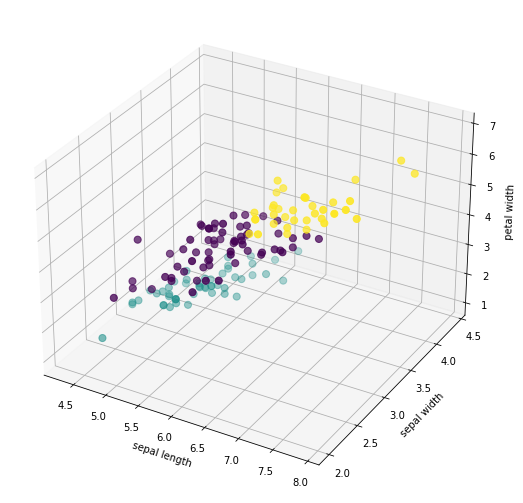

In [66]:
fig = plt.figure(figsize=(10,9))
ax = plt.subplot(projection='3d')
ax.scatter3D(mydata['sepal length'], mydata['sepal width'], mydata['petal length'], c=y_labels, s=50)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal width')
plt.show()

# Comparing different hierarchical linkage methods on synthetic datasets

In [71]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.cluster import AgglomerativeClustering
from itertools import cycle, islice

Generate datasets. We choose the size big enough to see the scalability of the algorithms, but not too big to avoid too long running times

In [98]:
# generate datasets
n_samples = 1500
noisy_circles = make_circles(n_samples=n_samples,  factor=0.5, noise=0.05)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
varied = make_blobs(n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=170) #blobs with varied variances
blobs = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.75, random_state=170)


## Plotting datasets

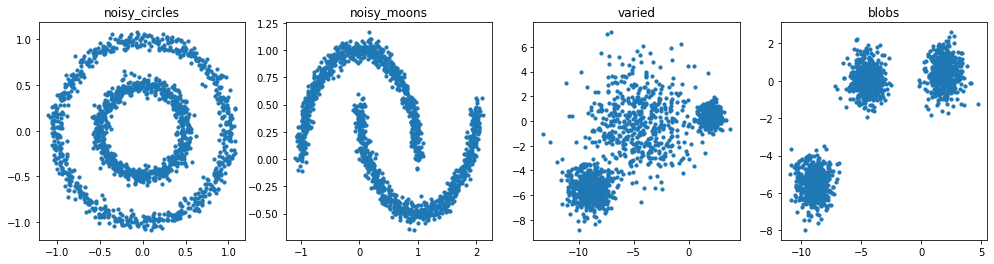

In [128]:
# set up the figures
figures, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(17,4))


# For noisy_circles
ax1.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], s=10)
ax1.set_title("noisy_circles")

# For noisy_moons
ax2.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], s=10)
ax2.set_title("noisy_moons")

# For varied
ax3.scatter(varied[0][:, 0], varied[0][:, 1], s=10)
ax3.set_title("varied")

# For blobs
ax4.scatter(blobs[0][:, 0], blobs[0][:, 1], s=10)
ax4.set_title("blobs")

plt.show()

Run the clustering and plot:

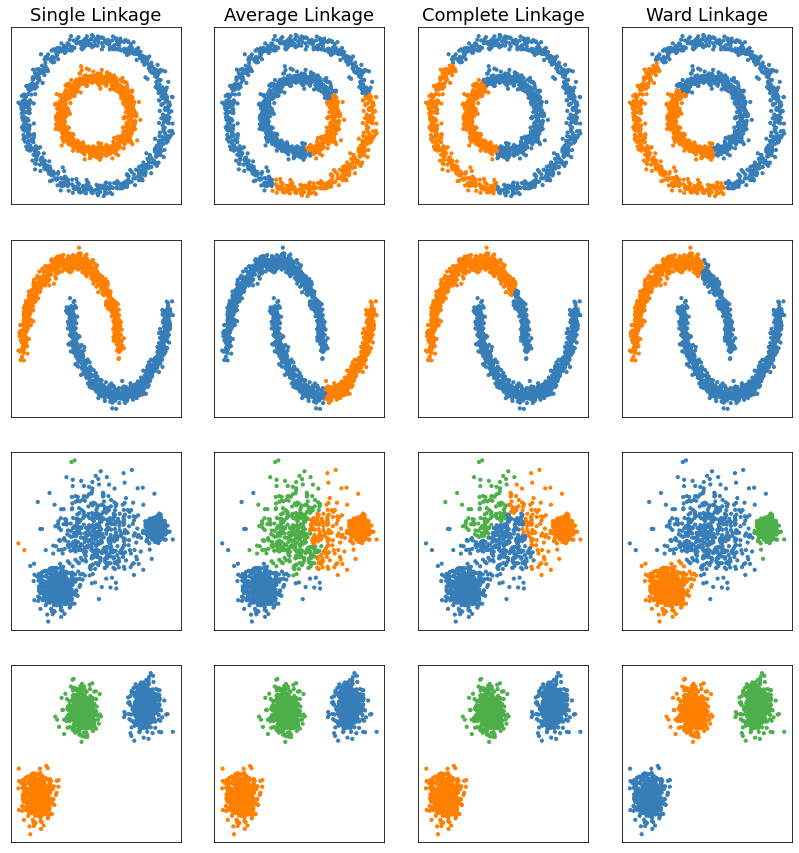

In [106]:
# Set up cluster parameters
plt.figure(figsize=(14, 15))

plot_num = 1

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_clusters": 3}),
    (blobs, {"n_clusters": 3}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    
    # define Input X and output y
    X, y = dataset

    # Create cluster objects
    ward = AgglomerativeClustering(
        n_clusters=algo_params["n_clusters"], linkage="ward"
    )
    complete = AgglomerativeClustering(
        n_clusters=algo_params["n_clusters"], linkage="complete"
    )
    average = AgglomerativeClustering(
        n_clusters=algo_params["n_clusters"], linkage="average"
    )
    single = AgglomerativeClustering(
        n_clusters=algo_params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:

        # Fit model
        algorithm.fit(X)

        # predict clusters
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_
        else:
            y_pred = algorithm.predict(X)

        # plot dataset with colors according to predicted clusters
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.show()